# 1. Load packages

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

or the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

import pandas as pd

42220


See **functions** in the repository for [AnalysisTool_Chromatin](../../functions/README.md)

In [2]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

In [3]:
import seaborn as sns
import scanpy as sc

## 1.1 Define output folder

In [4]:
output_main_folder = r'L:\Shiwei\Figures\MOp_draft_2023_v0\Cis_chromosome'
output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')


Use existing analysis folder: L:\Shiwei\Figures\MOp_draft_2023_v0\Cis_chromosome\analysis.
Use existing figure folder: L:\Shiwei\Figures\MOp_draft_2023_v0\Cis_chromosome\figures.


## 1.2 setting up plotting parameters

In [6]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

# 2. Load codebook

## Codebook

**Codebook** example from [codebook_link](../0_locus_annotation/resources/MERFISH_loci_adjacent_genes_tss_more_res.csv)

In [7]:
# load codebook
# L drive is Crick Pu_SSD_0
codebook_save_folder=r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin\resources'

# Load sorted codebook (allows direct matrix slicing) with cell type info
# Load codebook (then sort to allow direct matrix slicing) with cell type info

codebook_fname = os.path.join(codebook_save_folder,'MERFISH_loci_adjacent_genes_tss_more_res.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df temporailiy so matrix can be sliced by df order directly
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)

codebook_df.head()

,name,id,chr,chr_order,library,dtype,adjacent_genes_0kb_tss,adjacent_genes_10kb_tss,adjacent_genes_50kb_tss,adjacent_genes_100kb_tss,adjacent_genes_200kb_tss,adjacent_genes_500kb_tss,adjacent_genes_1000kb_tss,adjacent_genes_1500kb_tss,adjacent_genes_2000kb_tss
loci_name,,,,,,,,,,,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0,CTP11,combo,intergenic,intergenic,intergenic,Xkr4,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...
chr1_6245958_6258969,1:6245958-6258969,2,1,1,CTP11,combo,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...
chr1_8740008_8759916,1:8740008-8759916,3,1,2,CTP11,combo,intergenic,intergenic,Gm15452,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...
chr1_9627926_9637875,1:9627926-9637875,1,1,3,CTP13,combo,2610203C22Rik,2610203C22Rik,2610203C22Rik,2610203C22Rik; Adhfe1; Gm6161; Mybl1; Rrs1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...
chr1_9799472_9811359,1:9799472-9811359,2,1,4,CTP13,combo,Gm6195,Gm6195; Sgk3,Gm6195; Sgk3,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Vc...,1700034P13Rik; 2610203C22Rik; Gm6195; Mcmdc2; ...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...


# 3. Load Chr2Zxys dict and medianDict


Data below can be generated from the notebook as:

[preprocess/2_dna_merfish/scripts/2_spot_pick/4_summarize_jie_to_dict](../../preprocess/2_dna_merfish/scripts/2_spot_pick/4_summarize_jie_to_dict.ipynb)

In [8]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_20230201\MOp_WT_postanalysis\postanalysis_vCW2_sorted'
subclass_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'subclass_2_chr2Zxys.pkl')
subclass_2_chr2ZxysList = pickle.load(open(subclass_2_chr2Zxys_filename, 'rb'))

In [9]:
subclass_2_chr2ZxysList.keys()

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])

In [16]:
# subclass to median distance dict
subclass_2_median_filename = os.path.join(postanalysis_folder, 'subclass_2_medianDict.pkl')
if os.path.exists(subclass_2_median_filename):
    print("Loading median")
    subclass_2_medianDict = pickle.load(open(subclass_2_median_filename, 'rb'))
    
subclass_2_medianDict.keys()

Loading median


dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])

In [17]:
# subclass info
subclass_2_cellInfoList_filename = os.path.join(postanalysis_folder, 'subclass_2_cellInfo.pkl')
subclass_2_cellInfoList = pickle.load(open(subclass_2_cellInfoList_filename, 'rb'))

# 4. Extract trans distmap for all celltypes

In [18]:
from ImageAnalysis3.structure_tools import distance
sort_by_region=False
chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook_df, codebook_df, sort_by_region=False) ## load codebook


## unnormalized distmap

In [20]:
# get unnormalized distmap
cis_distmap_dict = {}
sel_codebook = codebook_df.copy(deep=True)
for _class in subclass_2_medianDict.keys():

    _cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
                                            subclass_2_medianDict[_class], codebook_df, 
                                            sel_codebook=sel_codebook, 
                                            use_cis=True,use_trans=False, sort_by_region=sort_by_region,
                                  )
    
    cis_distmap_dict[_class] = _cis_mat

In [22]:
import pickle
pickle.dump(cis_distmap_dict,open(os.path.join(output_analysis_folder,'raw_cis_distmap_subclass.pkl'),'wb'))

# 5.  Distmap summary and boxplot 

## Setup the loci name idx matrix

In [24]:
chr_2_orders
chr_2_indices

{'1': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152]),
 '2': array([153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 172, 173, 174, 1

In [33]:
loc_pair_idx_list_bychr = {}
for _chr_key in list(chr_2_orders.keys())[:]:
    # get loc name info
    loci_list = codebook_df.iloc[chr_2_indices[_chr_key]].index.tolist()
    # make loci idx mat from codebook
    codebook_idx_mat = np.empty([len(loci_list), len(loci_list)], dtype=object)
    for i in range(len(loci_list)):
        for j in range(len(loci_list)):
            codebook_idx_mat[i,j] = (i,j)
    # upper tri for the unique pair idx set        
    loc_pair_idx_list = codebook_idx_mat[np.triu_indices(len(codebook_idx_mat),0)] # 0 to include the trans-homolog allele 
    loc_pair_idx_list_bychr[_chr_key] = loc_pair_idx_list

loc_pair_idx_list_bychr.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'X', 'Y'])

## Summarize unnormalized distmap

In [39]:
# summarize all unique loci interactions across celltypes            
distmap_summary_dict = {'loc_1':[],'loc_2':[], 'pairwise_distance':[],'subclass':[], 'chr':[]}

for _class in subclass_2_medianDict.keys():
    _cis_mat = cis_distmap_dict[_class]
    # get cist mat for each chr
    for _chr_key in list(chr_2_orders.keys())[:]:
        _cis_mat_chr = _cis_mat[chr_2_indices[_chr_key],:]
        _cis_mat_chr = _cis_mat_chr[:,chr_2_indices[_chr_key]]
        _dists = _cis_mat_chr[np.triu_indices(len(_cis_mat_chr),0)] # 0 to include the trans-homolog allele
        distmap_summary_dict['pairwise_distance'].extend(_dists)
        distmap_summary_dict['subclass'].extend([_class,]*len(_dists))
        distmap_summary_dict['chr'].extend([_chr_key,]*len(_dists))
        # add loci name saved for each chr
        loci_list = codebook_df.iloc[chr_2_indices[_chr_key]].index.tolist()
        loc_pair_idx_list = loc_pair_idx_list_bychr[_chr_key] 
        distmap_summary_dict['loc_1'].extend(loci_list[idx[0]] for idx in loc_pair_idx_list)
        distmap_summary_dict['loc_2'].extend(loci_list[idx[1]] for idx in loc_pair_idx_list)
    
distmap_summary_df = pd.DataFrame(distmap_summary_dict)
distmap_summary_df.index.name='loci_pairs'
distmap_summary_df

,loc_1,loc_2,pairwise_distance,subclass,chr
loci_pairs,,,,,
0,chr1_3742742_3759944,chr1_3742742_3759944,0.000000,Oligo,1
1,chr1_3742742_3759944,chr1_6245958_6258969,0.922651,Oligo,1
2,chr1_3742742_3759944,chr1_8740008_8759916,1.070654,Oligo,1
3,chr1_3742742_3759944,chr1_9627926_9637875,1.060591,Oligo,1
4,chr1_3742742_3759944,chr1_9799472_9811359,1.093519,Oligo,1
...,...,...,...,...,...
2223475,chrX_167157164_167167452,chrX_169963295_170005197,0.845943,VLMC,X
2223476,chrX_168746045_168757590,chrX_168746045_168757590,0.000000,VLMC,X
2223477,chrX_168746045_168757590,chrX_169963295_170005197,0.706862,VLMC,X


## Add genomic distance

In [50]:
for _chr_name, _chr_group in distmap_summary_df.groupby(by='chr'):
    _chr_group_temp = _chr_group.copy(deep=True)
    _chr_group_temp['loc_1_start'] = _chr_group_temp['loc_1'].map(lambda x: int(x.split('_')[1]))
    _chr_group_temp['loc_2_start'] = _chr_group_temp['loc_2'].map(lambda x: int(x.split('_')[1]))
    _chr_group_temp['genomic_distance'] = _chr_group_temp['loc_2_start']-_chr_group_temp['loc_1_start']
    distmap_summary_df.loc[distmap_summary_df['chr']==_chr_name, 'genomic_distance'] = _chr_group_temp['genomic_distance'] 

distmap_summary_df.loc[:, 'genomic_distance']= distmap_summary_df['genomic_distance'].map(lambda x: int(x))
distmap_summary_df

C:\Users\shiwei\AppData\Local\Temp\2\ipykernel_31148\3846640317.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  distmap_summary_df.loc[:, 'genomic_distance']= distmap_summary_df['genomic_distance'].map(lambda x: int(x))


,loc_1,loc_2,pairwise_distance,subclass,chr,genomic_distance
loci_pairs,,,,,,
0,chr1_3742742_3759944,chr1_3742742_3759944,0.000000,Oligo,1,0
1,chr1_3742742_3759944,chr1_6245958_6258969,0.922651,Oligo,1,2503216
2,chr1_3742742_3759944,chr1_8740008_8759916,1.070654,Oligo,1,4997266
3,chr1_3742742_3759944,chr1_9627926_9637875,1.060591,Oligo,1,5885184
4,chr1_3742742_3759944,chr1_9799472_9811359,1.093519,Oligo,1,6056730
...,...,...,...,...,...,...
2223475,chrX_167157164_167167452,chrX_169963295_170005197,0.845943,VLMC,X,2806131
2223476,chrX_168746045_168757590,chrX_168746045_168757590,0.000000,VLMC,X,0
2223477,chrX_168746045_168757590,chrX_169963295_170005197,0.706862,VLMC,X,1217250


## Save

In [51]:
import tqdm
for _class in tqdm.tqdm(subclass_2_medianDict.keys()):
    _class_distmap_summary_df = distmap_summary_df[distmap_summary_df['subclass']==_class]
    _class_distmap_summary_df.to_csv(os.path.join(output_analysis_folder,'Cis_dismap_summary',
                                                  f'raw_cis_distmap_subclass_{_class.replace("/","_").replace(" ","_")}_summary.csv'))

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:16<00:00,  1.30it/s]


## Plot the boxplot summary for the unnormalized distmap

In [53]:
import tqdm

distmap_summary_df_list = []
for _class in tqdm.tqdm(subclass_2_medianDict.keys()):
    _class_distmap_summary_df = pd.read_csv(os.path.join(output_analysis_folder,'Cis_dismap_summary',
                                                  f'raw_cis_distmap_subclass_{_class.replace("/","_").replace(" ","_")}_summary.csv'),
                                           index_col=0)
    distmap_summary_df_list.append(_class_distmap_summary_df)
    
distmap_summary_df = pd.concat(distmap_summary_df_list)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:03<00:00,  5.61it/s]


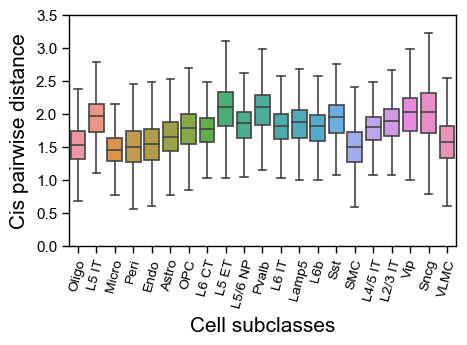

In [56]:
%matplotlib inline

import seaborn as sns
import scanpy as sc

# plot
fig, ax = plt.subplots(figsize=(5,3),dpi=100)

sns.boxplot(data=distmap_summary_df, x='subclass', y='pairwise_distance', 
            #order = sub_sorted_cellplot_order, 
            ax=ax, 
            fliersize=0,
            #palette=celltype_palette,
           )

#ax.set_xticklabels(sorted_types, rotation=70, fontsize=12)
plt.tick_params(axis='y', labelsize=11) 
plt.tick_params(axis='x', rotation=75, labelsize=10) 

ax.set_xlabel("Cell subclasses", fontsize=15, labelpad=5)
ax.set_ylabel("Cis pairwise distance", fontsize=15, labelpad=5)


ax.set_ylim([0,3.5])
ax.grid(False)

#plt.savefig(os.path.join(output_figure_folder, f'Trans_chrom_pairwise_distance_summary.pdf'), 
            #transparent=True, dpi=300, bbox_inches='tight')

plt.show()
